In [71]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
import datetime


In [128]:
#url = "https://app.box.com/s/jm6pw202asu4xd3uypwtry2rqk691y1i"
car_data = pd.read_csv('train.csv')

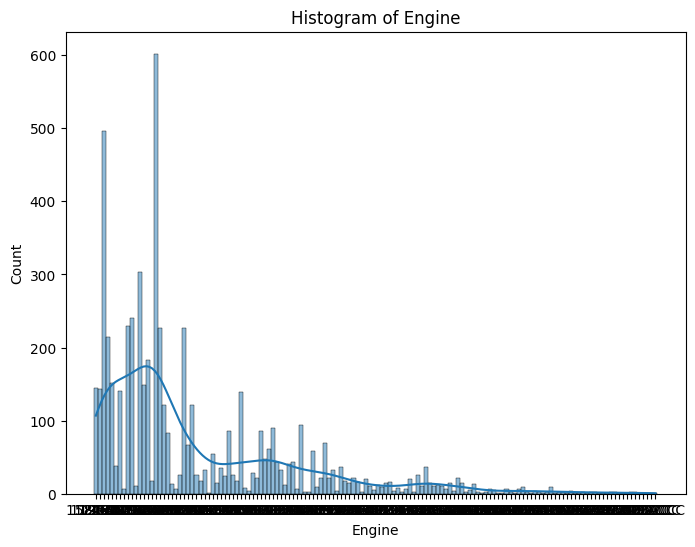

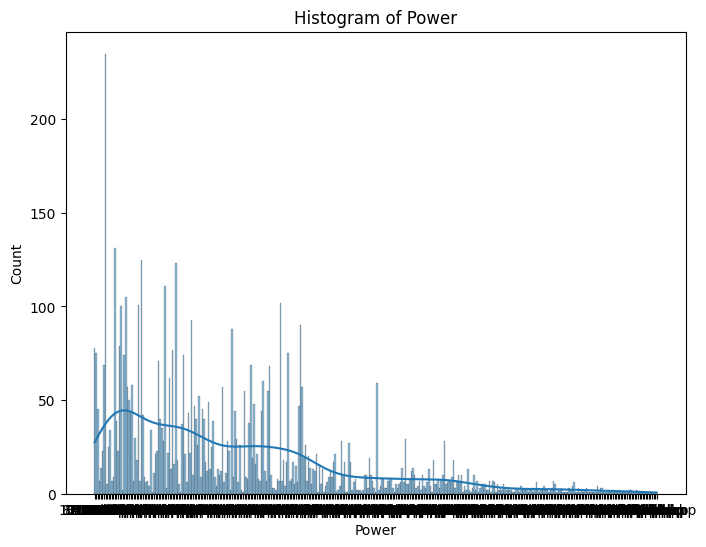

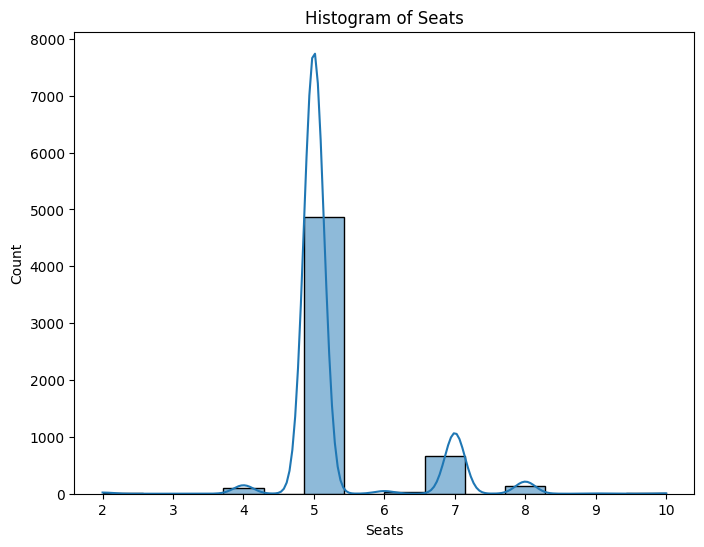

In [129]:
#Sow
plt.figure(figsize=(8, 6))
sns.histplot(car_data['Engine'], kde=True)
plt.title('Histogram of Engine')
plt.show()

plt.figure(figsize=(8, 6))
sns.histplot(car_data['Power'], kde=True)
plt.title('Histogram of Power')
plt.show()


plt.figure(figsize=(8, 6))
sns.histplot(car_data['Seats'], kde=True)
plt.title('Histogram of Seats')
plt.show()


In [130]:
#Find NULL values in the dataset
missing_count = car_data.isna().sum()
print(missing_count)

Unnamed: 0              0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 36
Power                  36
Seats                  38
New_Price            5032
Price                   0
dtype: int64


In [131]:
#b.Remove units of attributes
car_data['Mileage'] = car_data['Mileage'].str.split(' ', expand=True)[0].astype(float)
car_data['Engine'] = car_data['Engine'].str.split(' ', expand=True)[0].astype(float)
car_data['Power'] = car_data['Power'].str.split(' ', expand=True)[0].astype(float)
car_data['New_Price'] = car_data['New_Price'].str.split(' ', expand=True)[0].astype(float)
print(car_data.head())

   Unnamed: 0                              Name    Location  Year  \
0           1  Hyundai Creta 1.6 CRDi SX Option        Pune  2015   
1           2                      Honda Jazz V     Chennai  2011   
2           3                 Maruti Ertiga VDI     Chennai  2012   
3           4   Audi A4 New 2.0 TDI Multitronic  Coimbatore  2013   
4           6            Nissan Micra Diesel XV      Jaipur  2013   

   Kilometers_Driven Fuel_Type Transmission Owner_Type  Mileage  Engine  \
0              41000    Diesel       Manual      First    19.67  1582.0   
1              46000    Petrol       Manual      First    13.00  1199.0   
2              87000    Diesel       Manual      First    20.77  1248.0   
3              40670    Diesel    Automatic     Second    15.20  1968.0   
4              86999    Diesel       Manual      First    23.08  1461.0   

    Power  Seats  New_Price  Price  
0  126.20    5.0        NaN  12.50  
1   88.70    5.0       8.61   4.50  
2   88.76    7.0       

<ipython-input-132-9dc9ac8cf627>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(car_data['Engine'], shade=True)


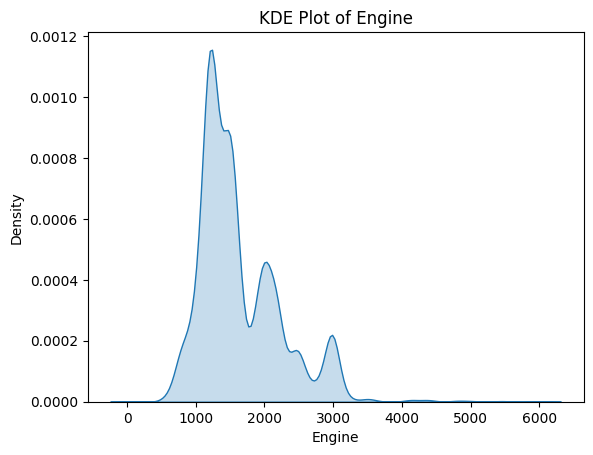

<ipython-input-132-9dc9ac8cf627>:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(car_data['Power'], shade=True)


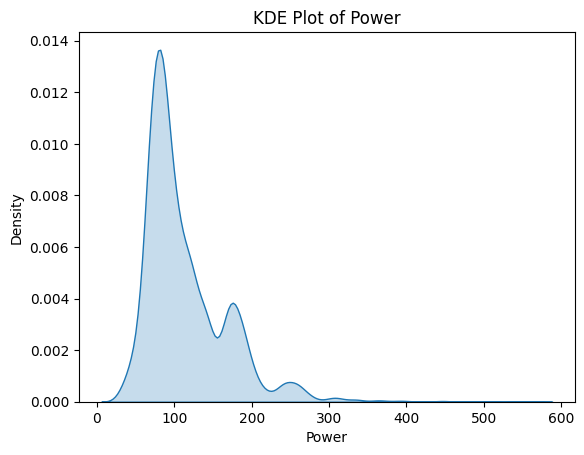

<ipython-input-132-9dc9ac8cf627>:10: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(car_data['Seats'], shade=True)


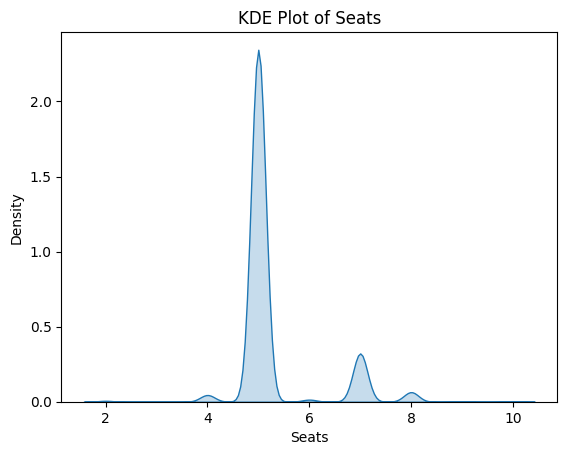

In [132]:
#Simmi
sns.kdeplot(car_data['Engine'], shade=True)
plt.title('KDE Plot of Engine')
plt.show()

sns.kdeplot(car_data['Power'], shade=True)
plt.title('KDE Plot of Power')
plt.show()

sns.kdeplot(car_data['Seats'], shade=True)
plt.title('KDE Plot of Seats')
plt.show()

In [133]:
#Nikki
mean_value = car_data['Engine'].mean()
median_value = car_data['Engine'].median()
print(f"Mean: {mean_value}")
print(f"Median: {median_value}")

mean_value = car_data['Power'].mean()
median_value = car_data['Power'].median()
print(f"Mean: {mean_value}")
print(f"Median: {median_value}")

mean_value = car_data['Seats'].mean()
median_value = car_data['Seats'].median()
print(f"Mean: {mean_value}")
print(f"Median: {median_value}")

Mean: 1631.552572706935
Median: 1497.0
Mean: 113.80314403717087
Median: 98.6
Mean: 5.286452057152694
Median: 5.0


In [134]:
car_data.shape

(5847, 14)

In [135]:
#a.
#Paraphrase comments in this cell
#Filling missing  values
#The data distribution has outliers and is a bit skewed but mean and median for these columns are close to each other
#so we can choose either mean or median
engine_mean = car_data['Engine'].mean()
car_data['Engine'].fillna(engine_mean, inplace=True)
power_mean = car_data['Power'].mean()
car_data['Power'].fillna(power_mean, inplace=True)
seats_mean = car_data['Seats'].mean()
car_data['Seats'].fillna(seats_mean, inplace=True)


#Drop New_Price column
#New_Price has a significant amount of missing values (around 5032 rows out of 5847 rows). Filling these missing values with mean,
#median or mode can influence the model performance. There are many other significant factors like engine, mileage to predict the
#target variable.
car_data = car_data.drop(columns = ['New_Price'])
car_data.head()

missing_count = car_data.isna().sum()
print(missing_count)

Unnamed: 0           0
Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              2
Engine               0
Power                0
Seats                0
Price                0
dtype: int64


In [136]:
car_data.shape

(5847, 13)

In [137]:
#c.One Hot Encoding
car_data = pd.get_dummies(car_data, columns=['Fuel_Type','Transmission'])
car_data.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Owner_Type,Mileage,Engine,Power,Seats,Price,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_Petrol,Transmission_Automatic,Transmission_Manual
0,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,First,19.67,1582.0,126.20,5.0,12.50,1,0,0,0,1
1,2,Honda Jazz V,Chennai,2011,46000,First,13.00,1199.0,88.70,5.0,4.50,0,0,1,0,1
2,3,Maruti Ertiga VDI,Chennai,2012,87000,First,20.77,1248.0,88.76,7.0,6.00,1,0,0,0,1
3,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Second,15.20,1968.0,140.80,5.0,17.74,1,0,0,1,0
4,6,Nissan Micra Diesel XV,Jaipur,2013,86999,First,23.08,1461.0,63.10,5.0,3.50,1,0,0,0,1


In [138]:
#d.
#Sow
#Adding new column to the dataset
current_year = datetime.datetime.now().year
car_data['Car_Age'] = current_year - car_data['Year']
car_data.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Owner_Type,Mileage,Engine,Power,Seats,Price,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_Petrol,Transmission_Automatic,Transmission_Manual,Car_Age
0,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,First,19.67,1582.0,126.20,5.0,12.50,1,0,0,0,1,8
1,2,Honda Jazz V,Chennai,2011,46000,First,13.00,1199.0,88.70,5.0,4.50,0,0,1,0,1,12
2,3,Maruti Ertiga VDI,Chennai,2012,87000,First,20.77,1248.0,88.76,7.0,6.00,1,0,0,0,1,11
3,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Second,15.20,1968.0,140.80,5.0,17.74,1,0,0,1,0,10
4,6,Nissan Micra Diesel XV,Jaipur,2013,86999,First,23.08,1461.0,63.10,5.0,3.50,1,0,0,0,1,10


In [141]:
#Simmi
present = datetime.datetime.now().year
car_data['Age'] = current_year - car_data['Year']
car_data['Mileage_per_Year'] = car_data['Mileage'] / car_data['Age']
car_data.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Owner_Type,Mileage,Engine,Power,Seats,Price,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_Petrol,Transmission_Automatic,Transmission_Manual,Car_Age,Age,Mileage_per_Year
0,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,First,19.67,1582.0,126.20,5.0,12.50,1,0,0,0,1,8,8,2.458750
1,2,Honda Jazz V,Chennai,2011,46000,First,13.00,1199.0,88.70,5.0,4.50,0,0,1,0,1,12,12,1.083333
2,3,Maruti Ertiga VDI,Chennai,2012,87000,First,20.77,1248.0,88.76,7.0,6.00,1,0,0,0,1,11,11,1.888182
3,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Second,15.20,1968.0,140.80,5.0,17.74,1,0,0,1,0,10,10,1.520000
4,6,Nissan Micra Diesel XV,Jaipur,2013,86999,First,23.08,1461.0,63.10,5.0,3.50,1,0,0,0,1,10,10,2.308000


In [143]:
#Nikki
#Adding new column to the dataset
now = datetime.datetime.now().year
car_data['Car_Life'] = now - car_data['Year']
car_data.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Owner_Type,Mileage,Engine,Power,Seats,Price,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_Petrol,Transmission_Automatic,Transmission_Manual,Car_Age,Age,Mileage_per_Year,Car_Life
0,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,First,19.67,1582.0,126.20,5.0,12.50,1,0,0,0,1,8,8,2.458750,8
1,2,Honda Jazz V,Chennai,2011,46000,First,13.00,1199.0,88.70,5.0,4.50,0,0,1,0,1,12,12,1.083333,12
2,3,Maruti Ertiga VDI,Chennai,2012,87000,First,20.77,1248.0,88.76,7.0,6.00,1,0,0,0,1,11,11,1.888182,11
3,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Second,15.20,1968.0,140.80,5.0,17.74,1,0,0,1,0,10,10,1.520000,10
4,6,Nissan Micra Diesel XV,Jaipur,2013,86999,First,23.08,1461.0,63.10,5.0,3.50,1,0,0,0,1,10,10,2.308000,10
